In [32]:
import categorical_preds as cp
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


## All pre-processing
- All pre-processing is from mod 5-- assignment 4
- This include removing nulls and converting categorical data into numeric data

In [11]:
x,y, df = cp.all_prep("../data/cars.csv",False)

In [5]:
x.shape, y.shape

((38521, 875), (38521,))

## K Means Clustering

## 2 Clusters

In [14]:
kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)

In [17]:
# get the predicted labels
kmeans_2_labels = kmeans_2.labels_

### Plot The Clusters Per Two Features

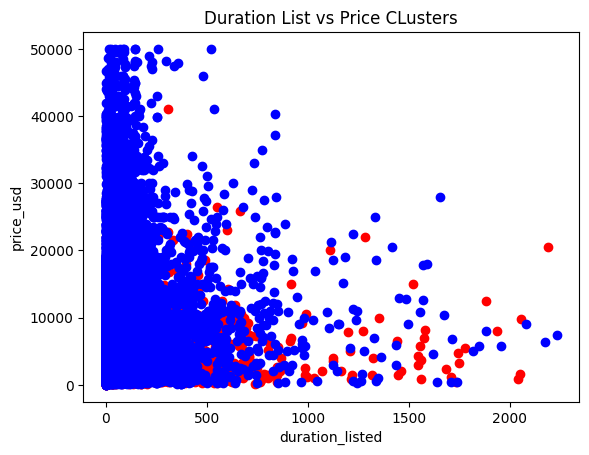

In [20]:
# duration listed over price
filtered_0 = df[kmeans_2_labels ==0]
filtered_1 = df[kmeans_2_labels ==1]
#plotting the results
plt.title('Duration List vs Price CLusters')
plt.xlabel('duration_listed')
plt.ylabel('price_usd')
plt.scatter(filtered_0["duration_listed"] , filtered_0["price_usd"], color= "red")
plt.scatter(filtered_1["duration_listed"], filtered_1["price_usd"], color = "blue")
plt.show()

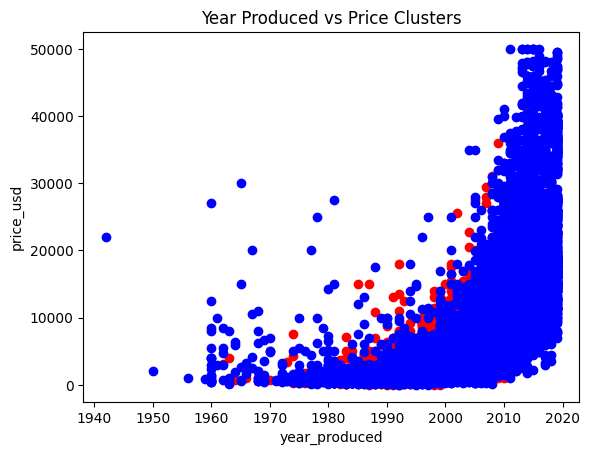

In [23]:
filtered_0 = df[kmeans_2_labels ==0]
filtered_1 = df[kmeans_2_labels ==1]
#plotting the results
# year produced over price
plt.title('Year Produced vs Price Clusters')
plt.xlabel('year_produced')
plt.ylabel('price_usd')
plt.scatter(filtered_0["year_produced"] , filtered_0["price_usd"], color= "red")
plt.scatter(filtered_1["year_produced"], filtered_1["price_usd"], color = "blue")
plt.show()

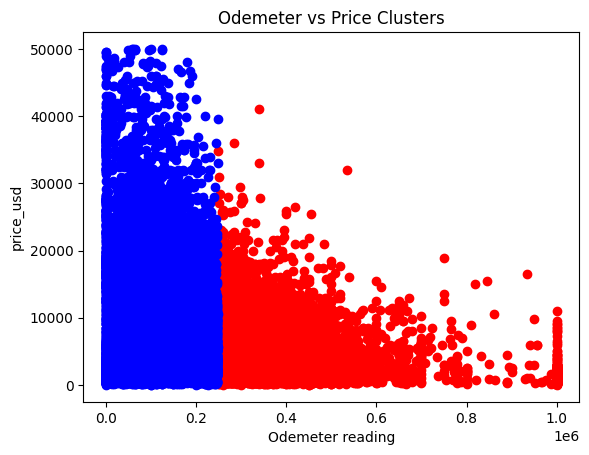

In [24]:
# odemeter reading over price
filtered_0 = df[kmeans_2_labels ==0]
filtered_1 = df[kmeans_2_labels ==1]
#plotting the results
plt.title('Odemeter vs Price Clusters')
plt.xlabel('Odemeter reading')
plt.ylabel('price_usd')
plt.scatter(filtered_0.iloc[:,0] , filtered_0["price_usd"], color= "red")
plt.scatter(filtered_1.iloc[:,0], filtered_1["price_usd"], color = "blue")
plt.show()

### Get Some Metrics
    - Inertia 
        - measures the distance from each data point to the clusters centroid. The lower the score the better
    - Silhouette_score
        - Is a balance of cohesiveness, how close/tight clusters are, and separateness, how spread apart are clusters from each other.
        - Score will be between -1 and 1. Values of 0 means overlapping clusters. -1 score means clusters have been assigned wrong label
    - Davies-Bouldin score
        - The average similarity measure of each cluster with the cluster most similar to it
        - clusters that have more distance to each other and are less dispersed will result in the best score
        - The best score is 0. The lower the better the score
    

In [36]:
# Get Inertia
print("Inertia Score for 2 Clusters",kmeans_2.inertia_)
sil_score_2 = metrics.silhouette_score(x, kmeans_2_labels)
print("Silhouette Score for 2 Clusters", sil_score_2)
dave_score_2 = metrics.davies_bouldin_score(x, kmeans_2_labels)
print("Davies-Bouldin  for 2 Clusters", sil_score_2)


Inertia Score for 2 Clusters 313683860671664.9
Silhouette Score for 2 Clusters 0.543597635522046
Davies-Bouldin  for 2 Clusters 0.543597635522046


### Analysis of 2 Clusters
- The inertia score for K means is very high, which means the distance to the center is very long
- The silhouette score impliesis greater than zero, so it implies theres not too much overlap in clusters
- The Davies-Bouldin score implies the clusters are relatively close to each other

## 5 Custers

In [37]:
kmeans_5 = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(x)

In [39]:
kmeans_5_labels = kmeans_5.labels_

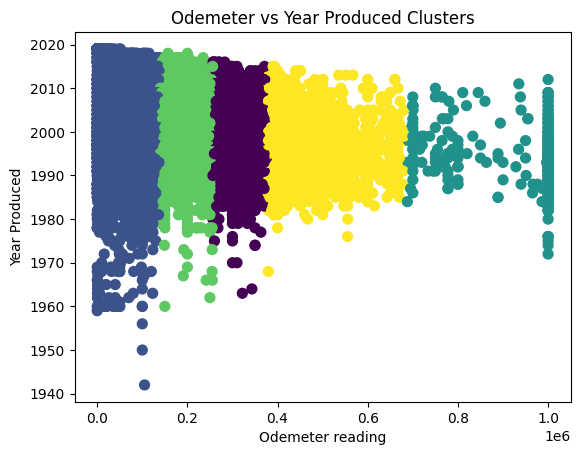

In [41]:
# odemeter reading over year produced
plt.title('Odemeter vs Year Produced Clusters')
plt.xlabel('Odemeter reading')
plt.ylabel('Year Produced')
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_5_labels, s=50, cmap='viridis')

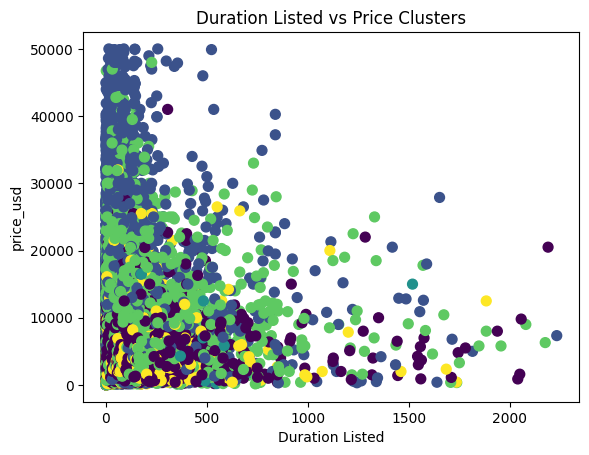

In [42]:
# duration over price
plt.title('Duration Listed vs Price Clusters')
plt.xlabel('Duration Listed')
plt.ylabel('price_usd')
plt.scatter(df["duration_listed"] , df["price_usd"], c=kmeans_5_labels, s=50, cmap='viridis')

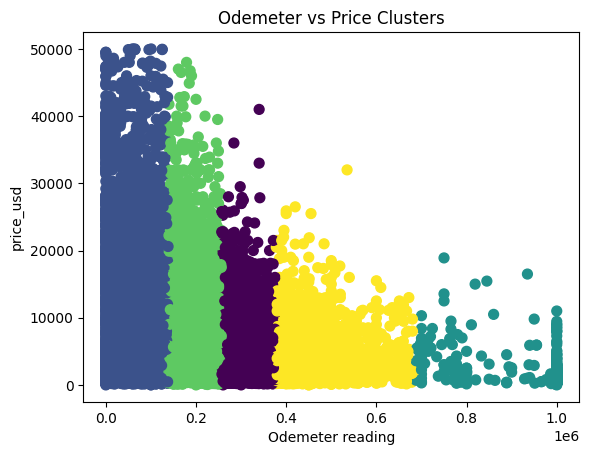

In [43]:
# odemeter over price
plt.title('Odemeter vs Price Clusters')
plt.xlabel('Odemeter reading')
plt.ylabel('price_usd')
plt.scatter(df.iloc[:,0] , df["price_usd"], c=kmeans_5_labels, s=50, cmap='viridis')

In [44]:
# Get Inertia
print("Inertia Score for 5 Clusters",kmeans_5.inertia_)
sil_score_5 = metrics.silhouette_score(x, kmeans_5_labels)
print("Silhouette Score for 5 Clusters", sil_score_5)
dave_score_5 = metrics.davies_bouldin_score(x, kmeans_5_labels)
print("Davies-Bouldin  for 5 Clusters", sil_score_5)

Inertia Score for 5 Clusters 67001583124310.48
Silhouette Score for 5 Clusters 0.5265992542838839
Davies-Bouldin  for 5 Clusters 0.5265992542838839


### Analysis of 5 Clusters
- The inertia score for K means is very high, which means the distance to the center is very long
    - But this score is lower than clustering of 2 clusters
- The silhouette score impliesis greater than zero, so it implies theres not too much overlap in clusters
    - The score did improve by .02 from 2 clusters
- The Davies-Bouldin score implies the clusters are relatively close to each other
    - The score did improve by .02 from 2 clusters 

## 10 Clusters

In [45]:
kmeans_10 = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(x)

In [46]:
kmeans_10_labels = kmeans_10.labels_

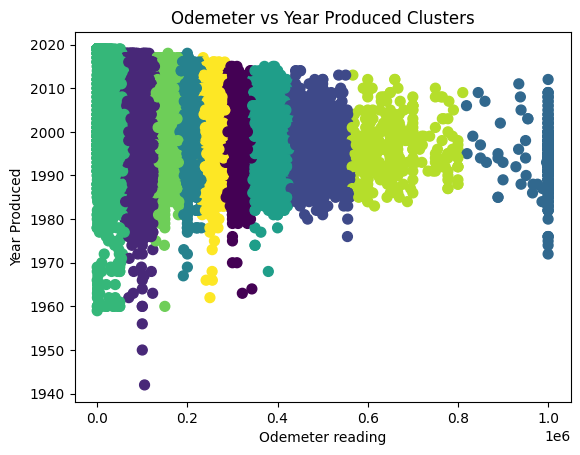

In [47]:
# odemeter reading over year produced
plt.title('Odemeter vs Year Produced Clusters')
plt.xlabel('Odemeter reading')
plt.ylabel('Year Produced')
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_10_labels, s=50, cmap='viridis')

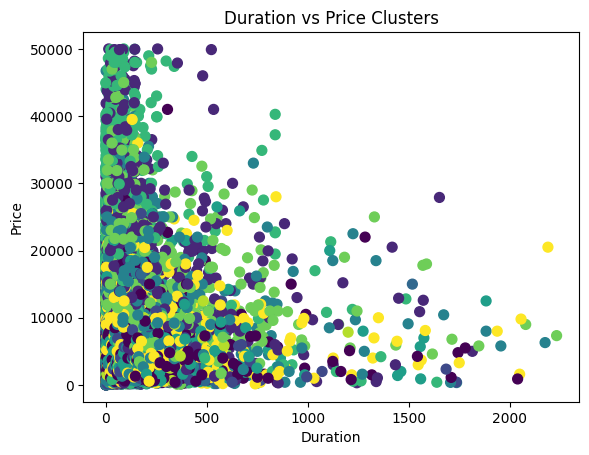

In [48]:
# duration list over price 
plt.title('Duration vs Price Clusters')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.scatter(df["duration_listed"] , df["price_usd"], c=kmeans_10_labels, s=50, cmap='viridis')

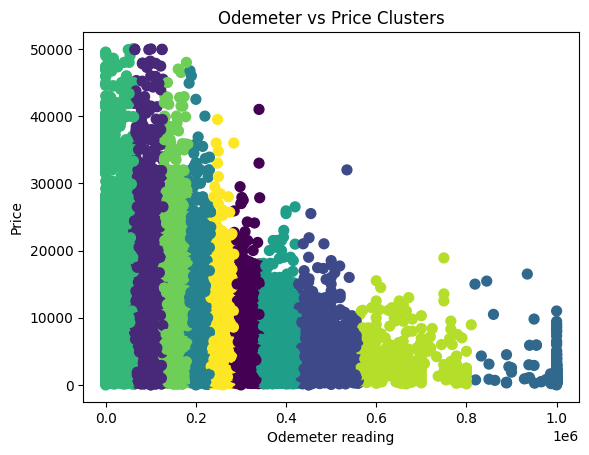

In [49]:
# odemeter over price 
plt.title('Odemeter vs Price Clusters')
plt.xlabel('Odemeter reading')
plt.ylabel('Price')
plt.scatter(df.iloc[:,0] , df["price_usd"], c=kmeans_10_labels, s=50, cmap='viridis')

In [50]:
# Get Inertia
print("Inertia Score for 10 Clusters",kmeans_10.inertia_)
sil_score_10 = metrics.silhouette_score(x, kmeans_10_labels)
print("Silhouette Score for 10 Clusters", sil_score_10)
dave_score_10 = metrics.davies_bouldin_score(x, kmeans_10_labels)
print("Davies-Bouldin  for 10 Clusters", sil_score_10)

Inertia Score for 10 Clusters 16534133032930.078
Silhouette Score for 10 Clusters 0.5117195298815829
Davies-Bouldin  for 10 Clusters 0.5117195298815829


### Analysis of 10 Clusters
- The inertia score for K means is very high, which means the distance to the center is very long
    - But this score is lower than clustering of 2 and 5 clusters
- The silhouette score impliesis greater than zero, so it implies theres not too much overlap in clusters
    - The score did improve by .01 from 5 clusters
- The Davies-Bouldin score implies the clusters are relatively close to each other
    - The score did improve by .01 from 5 clusters

## Elbow Method to find Optimal Number of Clusters
- The point in the elbow is the optimal number of clusters

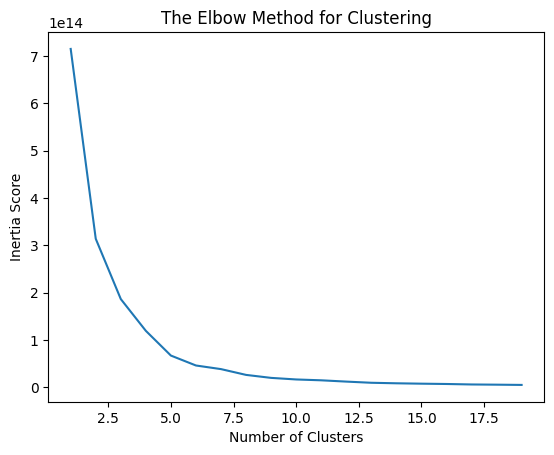

In [53]:
clusters = []

for i in range(1,20):
    k = KMeans(n_clusters =i, random_state=0, n_init="auto")
    k.fit(x)
    clusters.append(k.inertia_)
plt.title('The Elbow Method for Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.plot(range(1,20), clusters)
plt.show()

## Overall Insights

- For all cluster sizes: 2, 5 and 10 the following is true
    - The distinction of clusters was most clear when comparing odemeter reading over year produced or odemeter over price
    - No overlap of clusters when comparing odemeter to price or odemeter to year produced
    - There's overlap in clusters between duration and price. 
    - There's overlap in clusters between year produced and price
- Based on the elbow method, the optimal number number of clusters is 5
- Based on the 3 performance metrics, 10 had the best performance on clustering the data